# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Read Dataset & check missing values

In [2]:
file_path = r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\playground-series-s4e8\train.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [5]:
df.isna().sum().sort_values(ascending=False)

veil-type               2957493
spore-print-color       2849682
stem-root               2757023
veil-color              2740947
stem-surface            1980861
gill-spacing            1258435
cap-surface              671023
gill-attachment          523936
ring-type                128880
gill-color                   57
habitat                      45
cap-shape                    40
stem-color                   38
has-ring                     24
cap-color                    12
does-bruise-or-bleed          8
cap-diameter                  4
id                            0
stem-width                    0
class                         0
stem-height                   0
season                        0
dtype: int64

In [6]:
df['veil-type'].value_counts().sum()

159452

# Handle Missing Values

In [7]:
key_features = ['veil-type', 'spore-print-color', 'stem-root' , 'veil-color' , 'stem-surface' , 'gill-spacing' , 'cap-surface' , 'gill-attachment' , 'ring-type']


In [8]:
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64


In [9]:
# Define a threshold for dropping columns based on missing values
missing_threshold = 50  # Drop columns with more than 50% missing values

# Separate columns to drop and to handle
columns_to_drop = []
columns_to_handle = []

for column in df.columns:
    if missing_percentages[column] > missing_threshold:
        if column not in key_features:
            columns_to_drop.append(column)
        else:
            columns_to_handle.append(column)
    else:
        columns_to_handle.append(column)

# Drop columns
df_cleaned = df.drop(columns=columns_to_drop)

# Handle missing values in key features
for column in columns_to_handle:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])
    else:
        df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mean())

print("Dropped columns:", columns_to_drop)
print("Handled columns:", columns_to_handle)


Dropped columns: []
Handled columns: ['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [10]:
df_cleaned.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [11]:
df_cleaned.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

# Split Data into Catigorical & nummerical

In [12]:
catigorical_col = df_cleaned.select_dtypes(include='object')
nummerical_col = df_cleaned.select_dtypes(exclude='object')

In [13]:
catigorical_col

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,f,s,u,f,a,c,w,b,s,w,u,w,f,f,k,d,a
1,p,x,h,o,f,a,c,n,b,y,o,u,w,t,z,k,d,w
2,e,f,s,b,f,x,c,w,b,s,n,u,w,f,f,k,l,w
3,e,f,y,g,f,s,c,g,b,s,w,u,w,f,f,k,d,u
4,e,x,l,w,f,d,c,w,b,s,w,u,w,f,f,k,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,f,t,n,t,a,c,w,b,s,w,u,w,t,g,k,d,u
3116941,e,s,t,w,t,d,c,p,b,s,w,u,w,f,f,k,d,u
3116942,p,x,e,e,f,a,c,w,b,s,y,u,w,t,z,k,d,a
3116943,e,p,i,n,t,e,c,p,b,y,w,u,w,t,p,k,d,u


In [14]:
nummerical_col

,id,cap-diameter,stem-height,stem-width
0,0,8.80,4.51,15.39
1,1,4.51,4.79,6.48
2,2,6.94,6.85,9.93
3,3,3.88,4.16,6.53
4,4,5.85,3.37,8.36
...,...,...,...,...
3116940,3116940,9.29,12.14,18.81
3116941,3116941,10.88,6.65,26.97
3116942,3116942,7.82,9.51,11.06
3116943,3116943,9.45,9.13,17.77


# Visualize Data

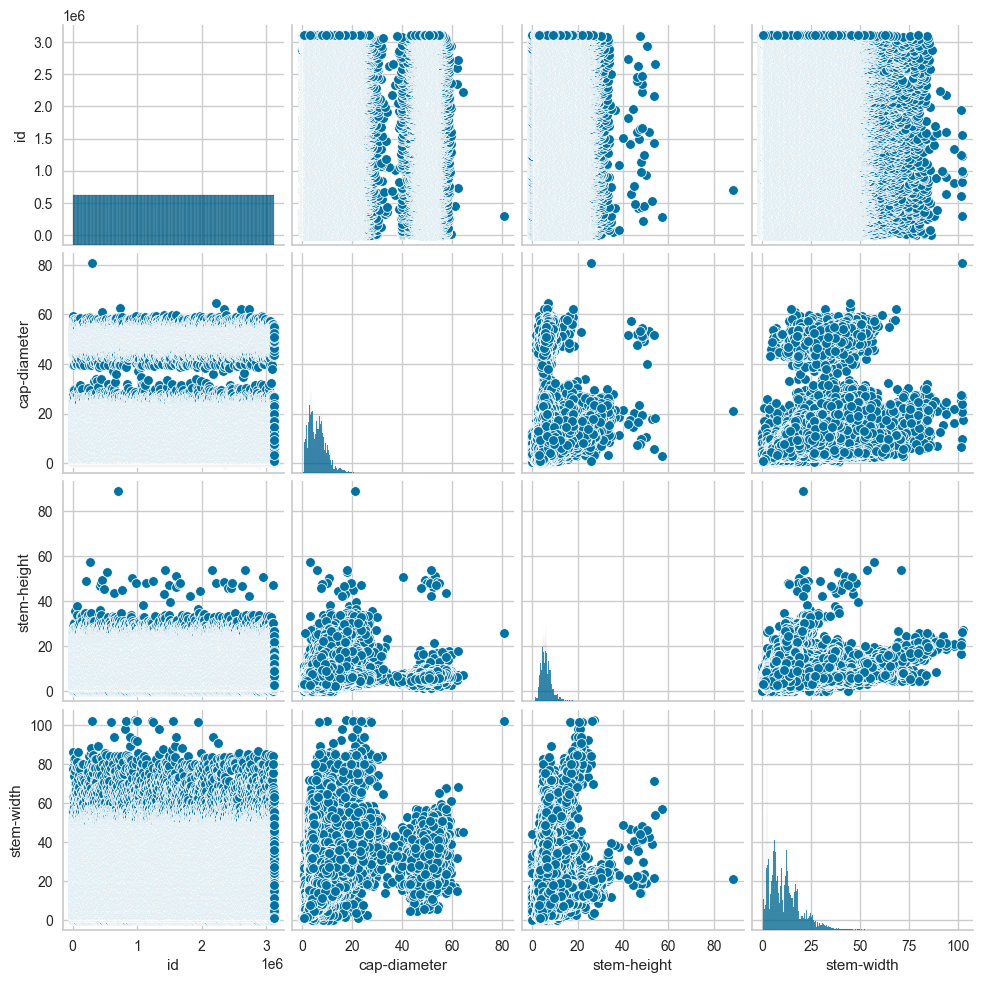

In [15]:
sns.pairplot(nummerical_col)

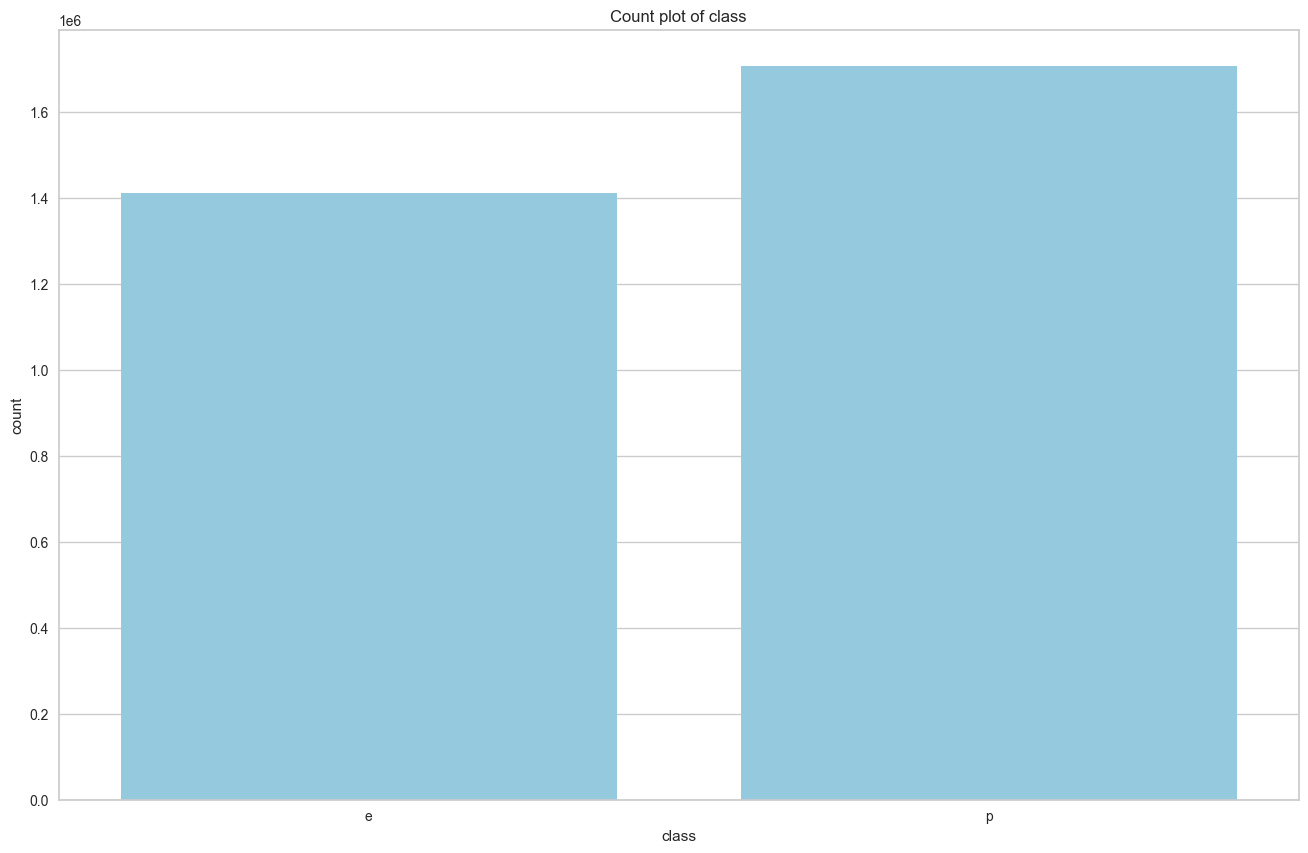

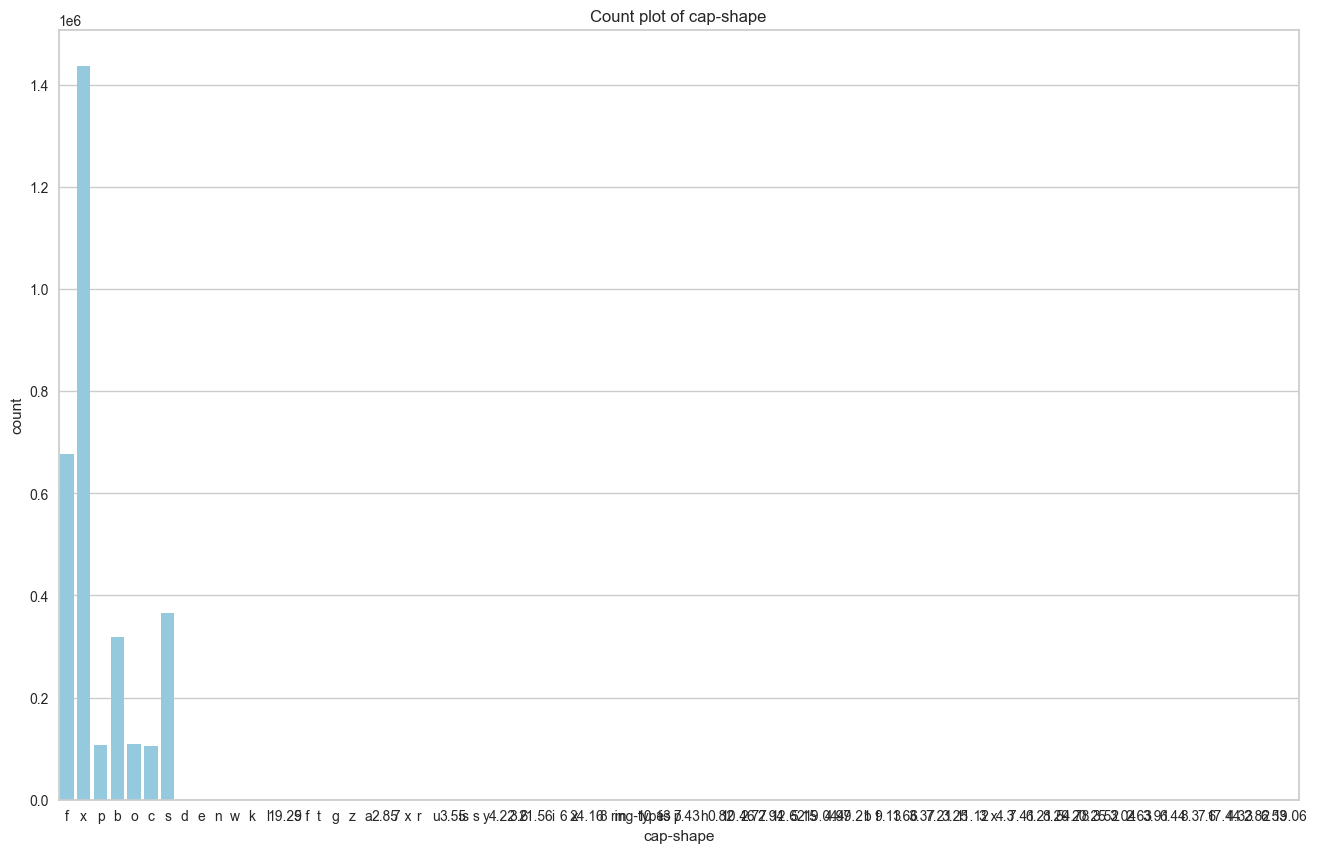

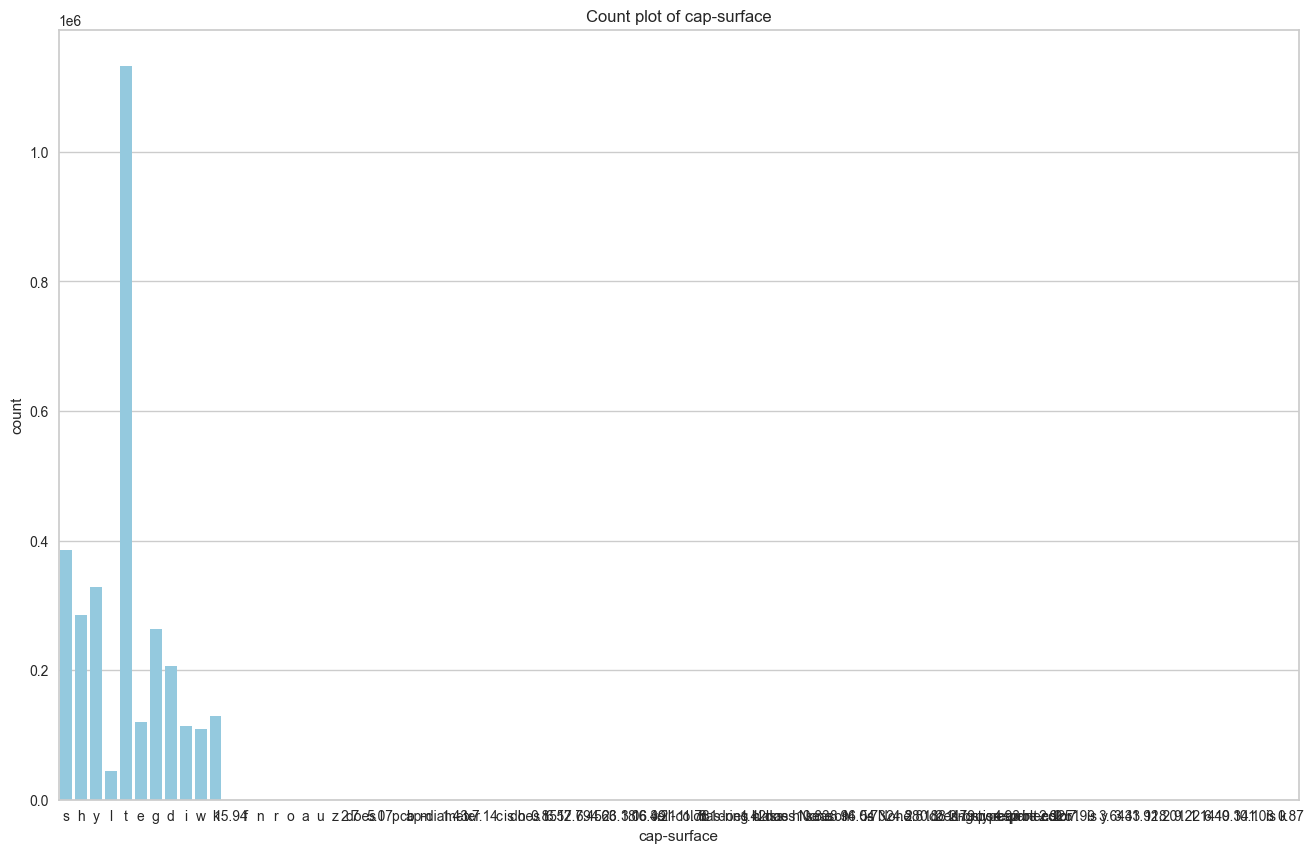

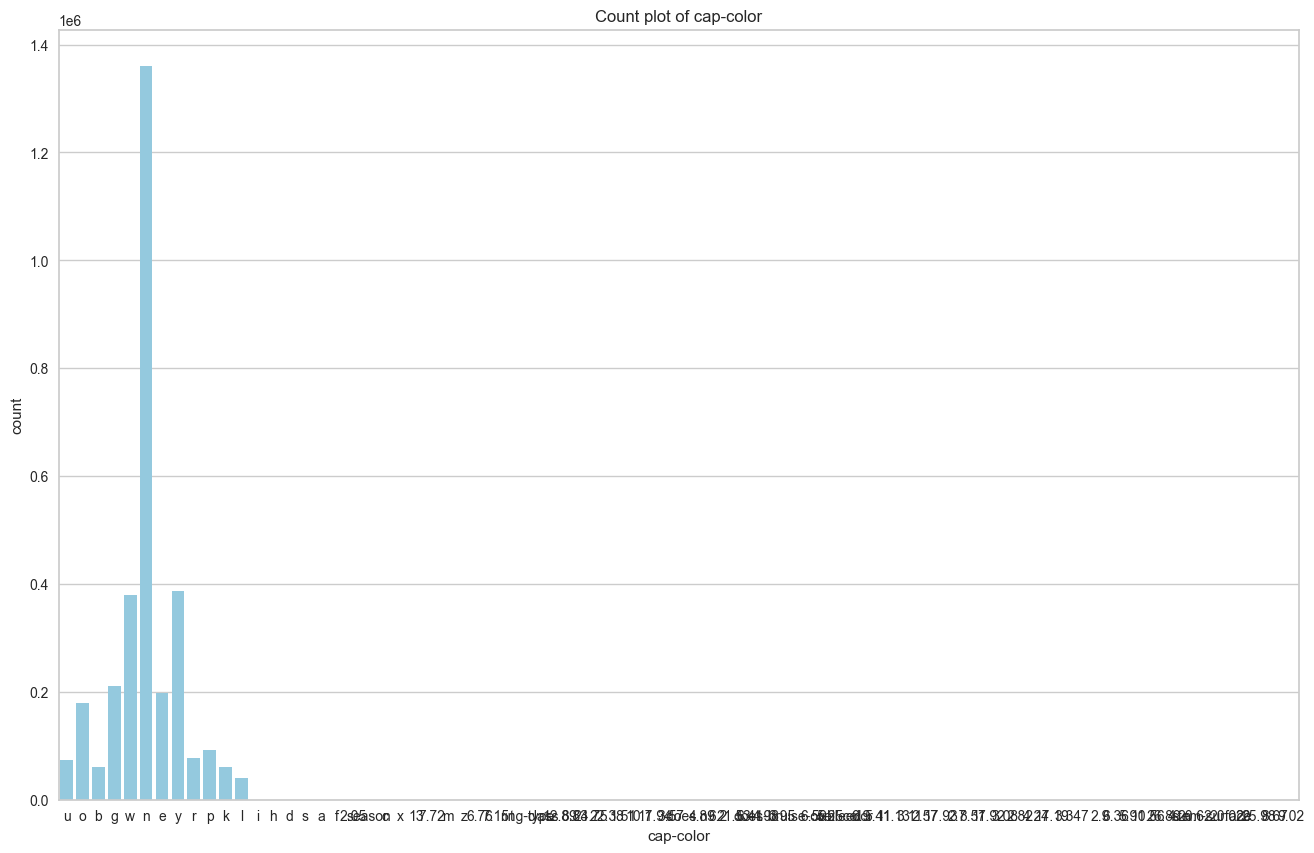

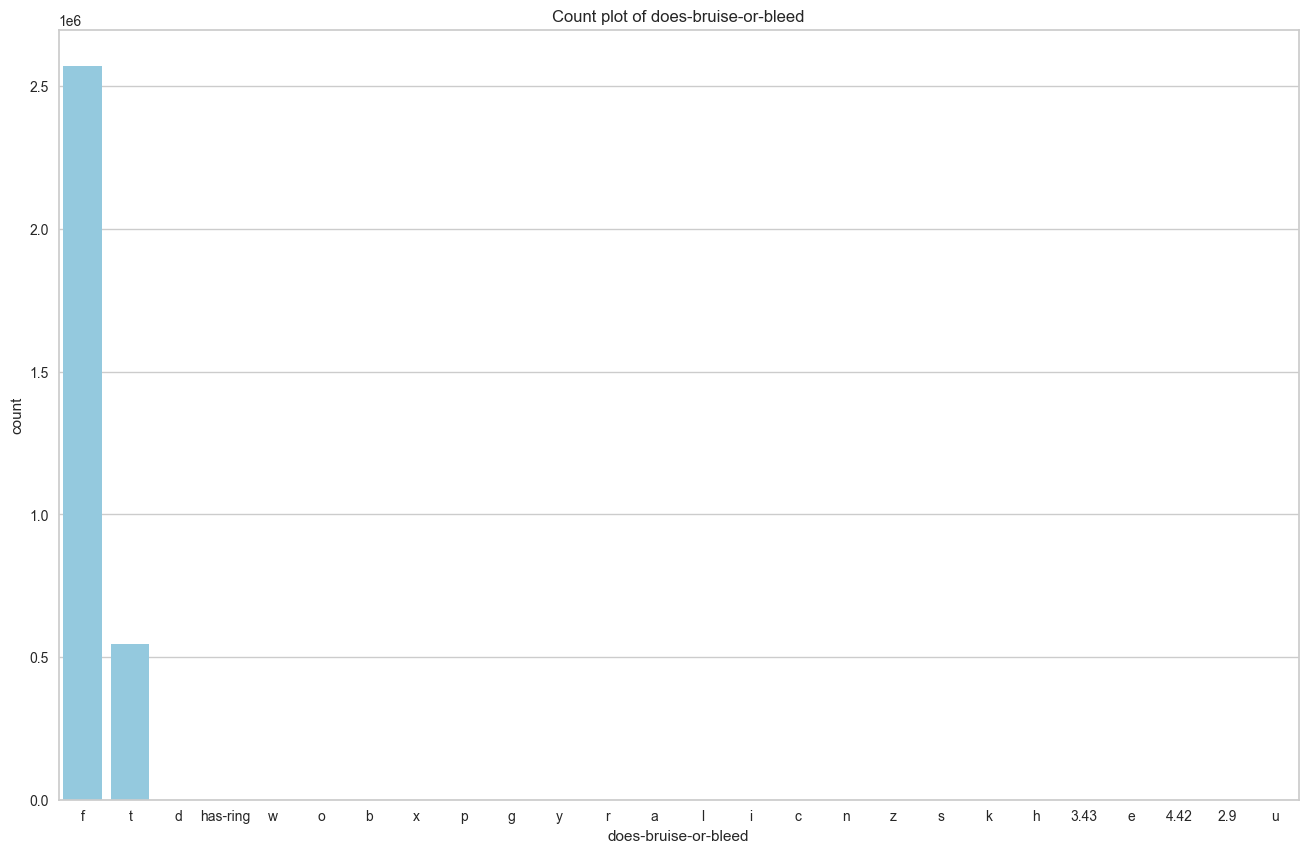

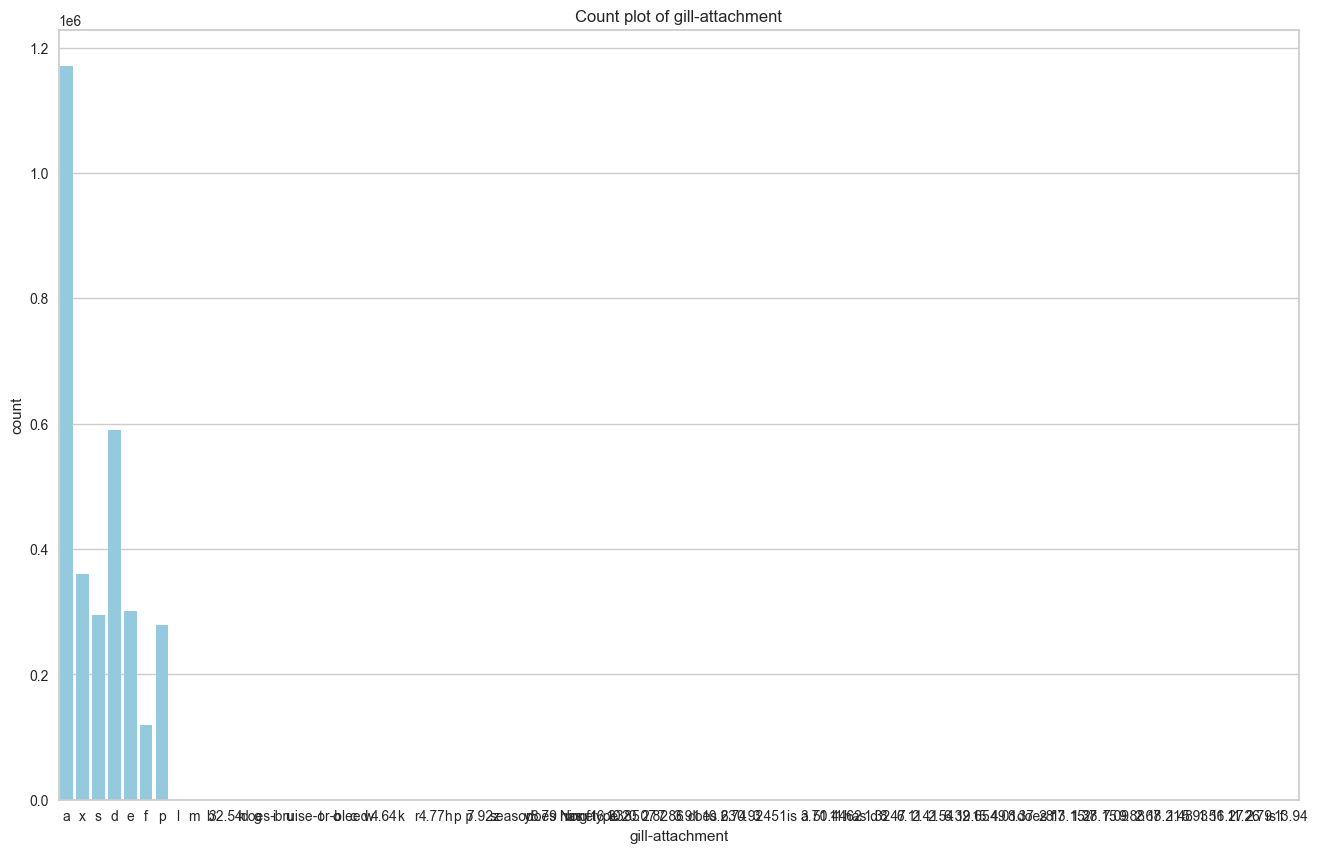

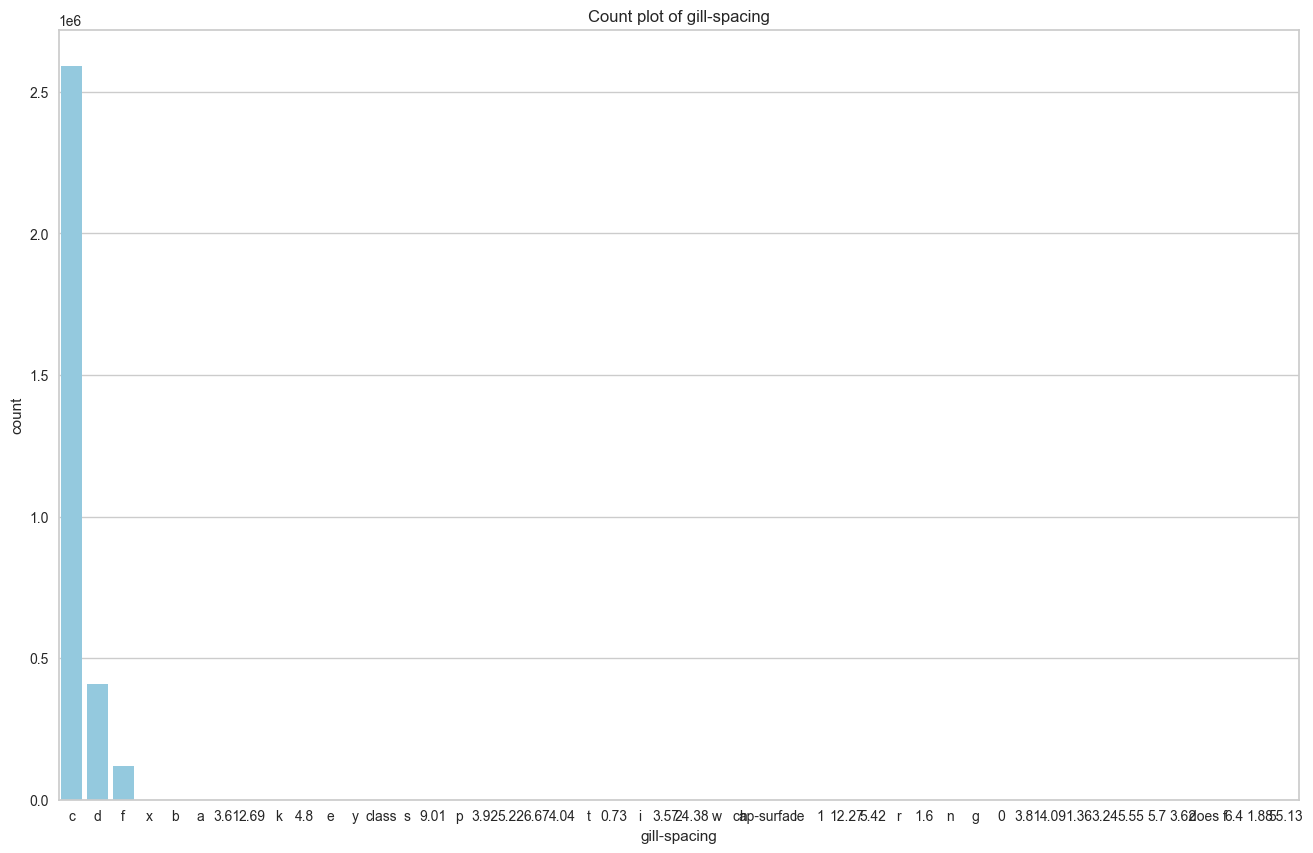

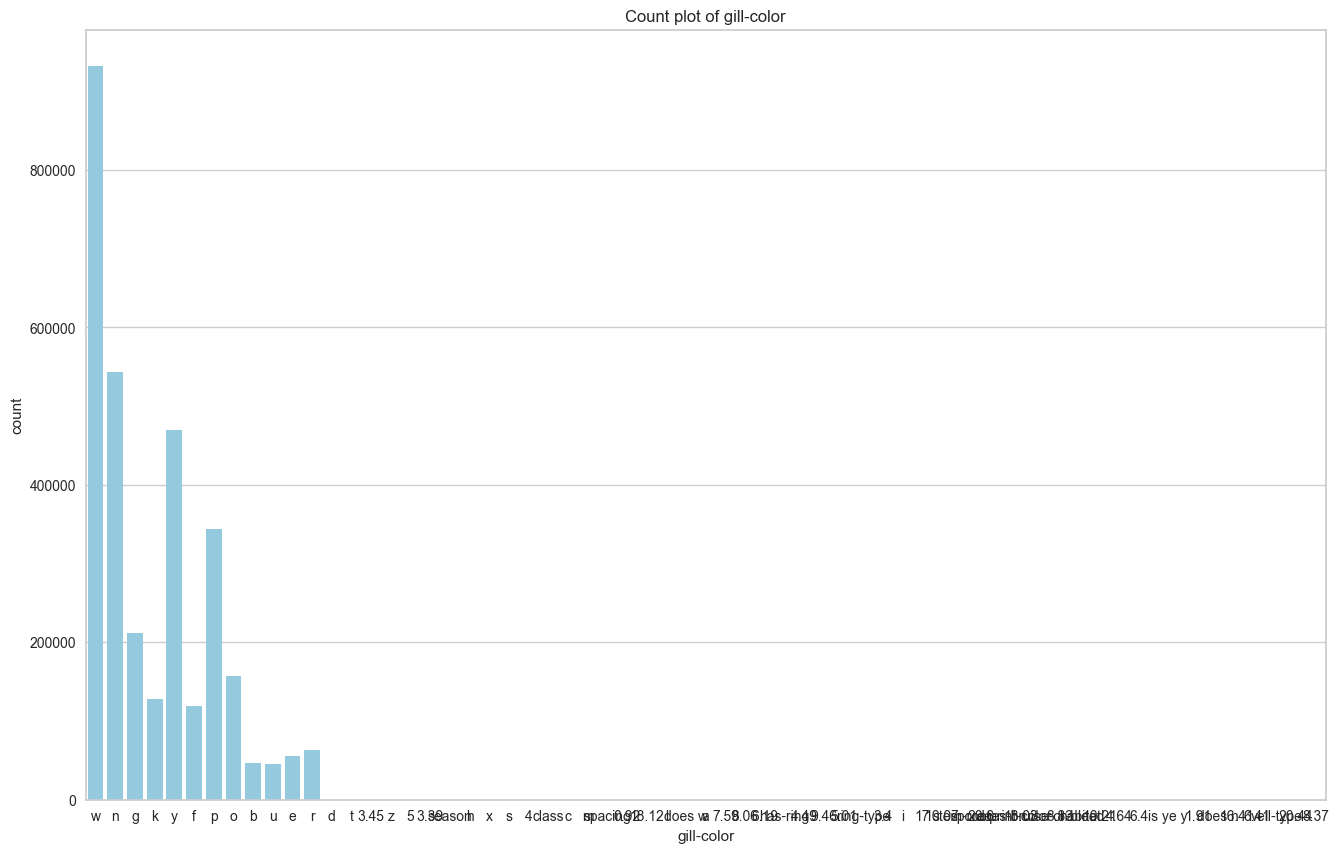

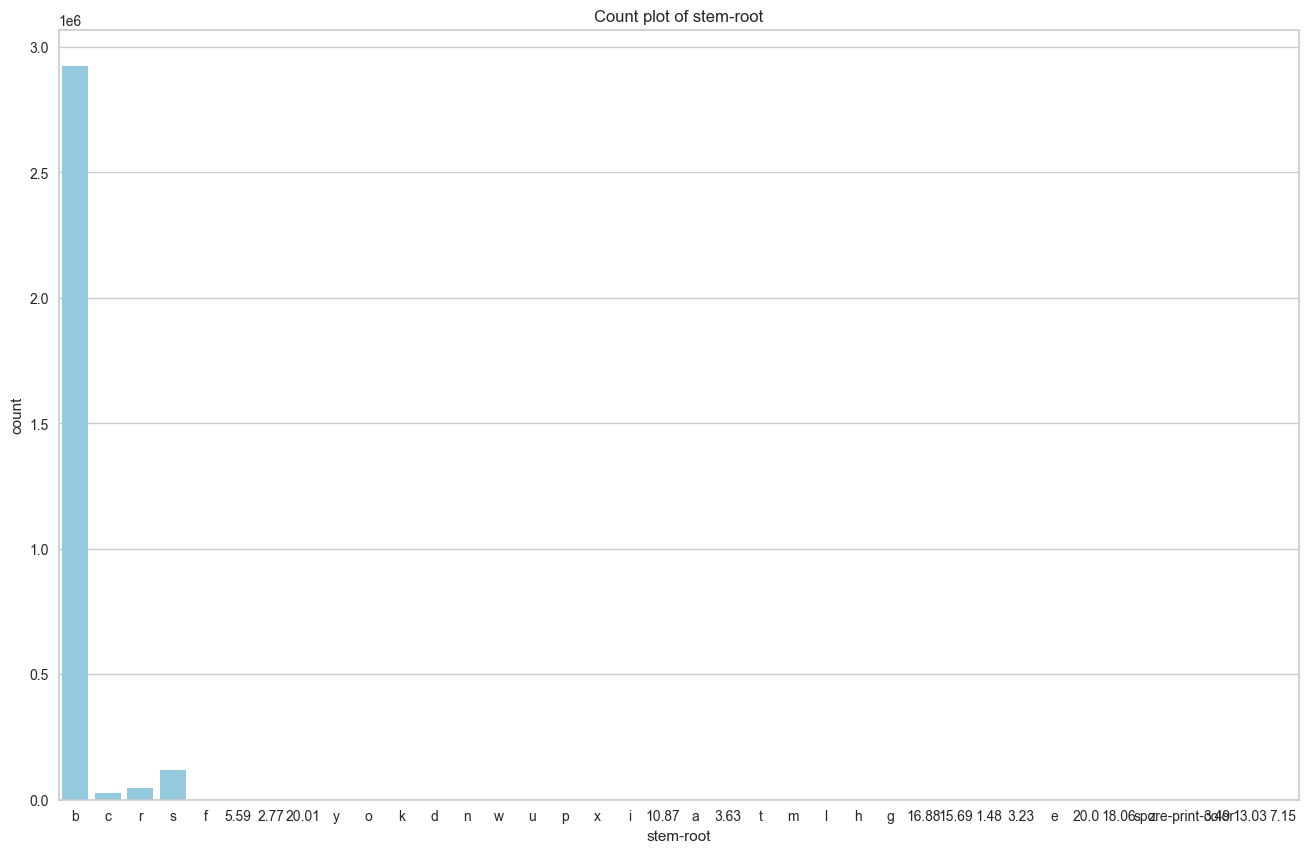

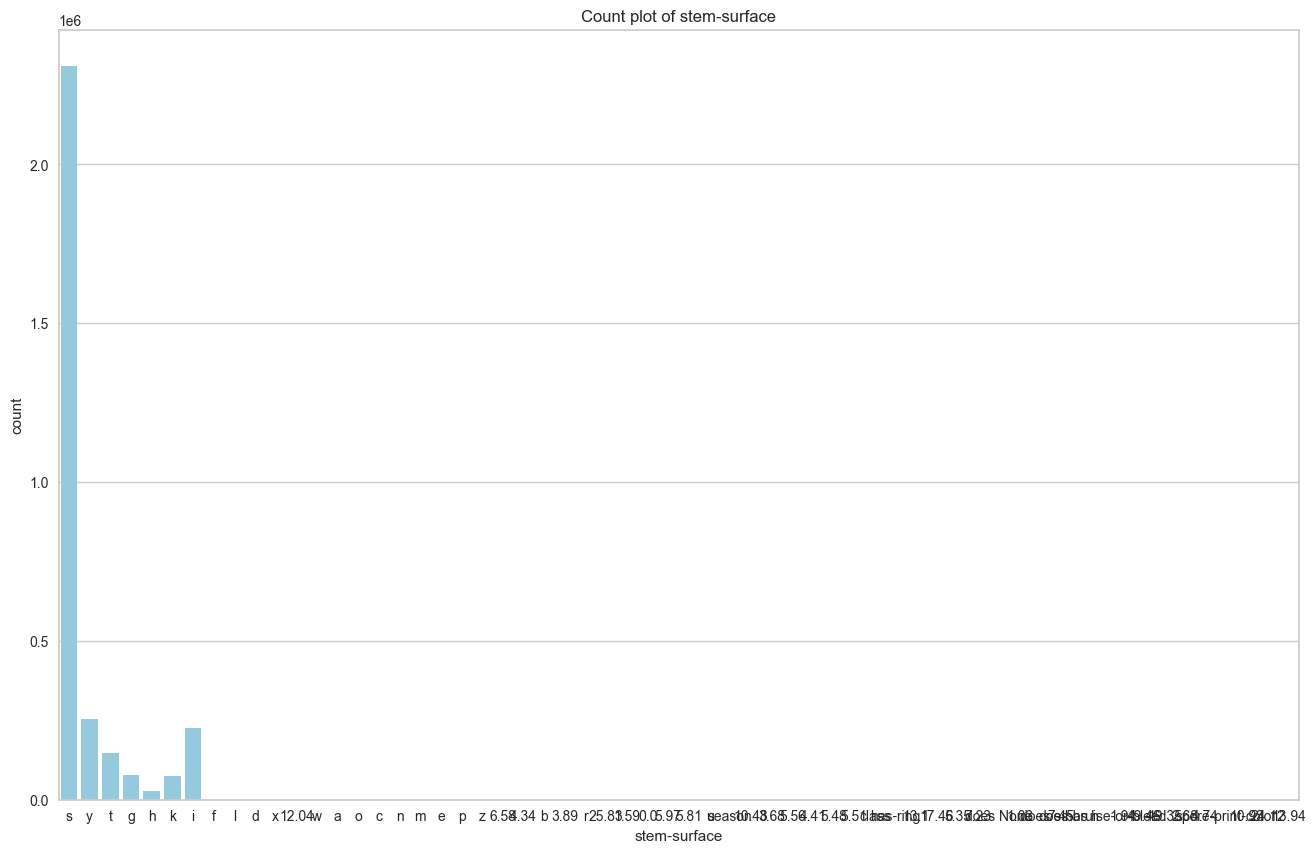

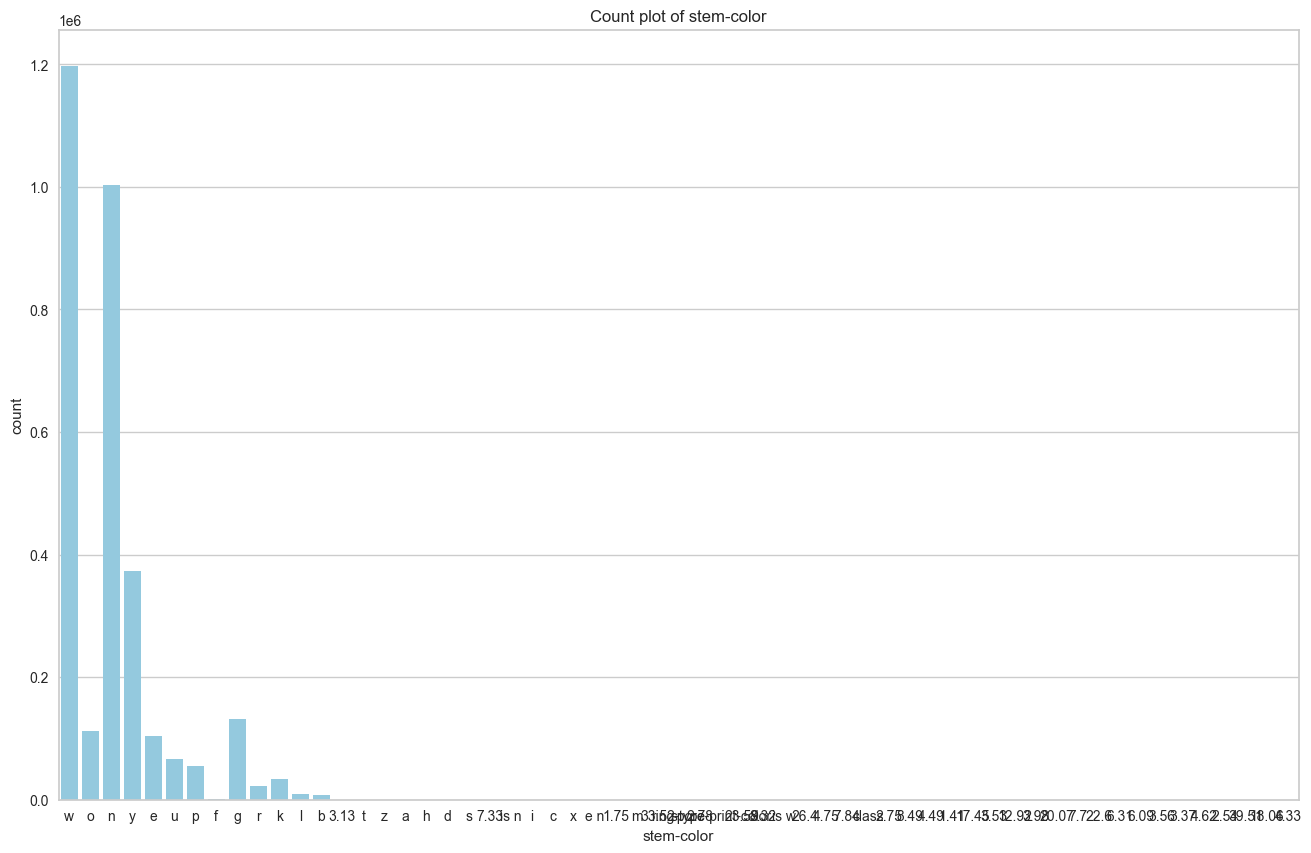

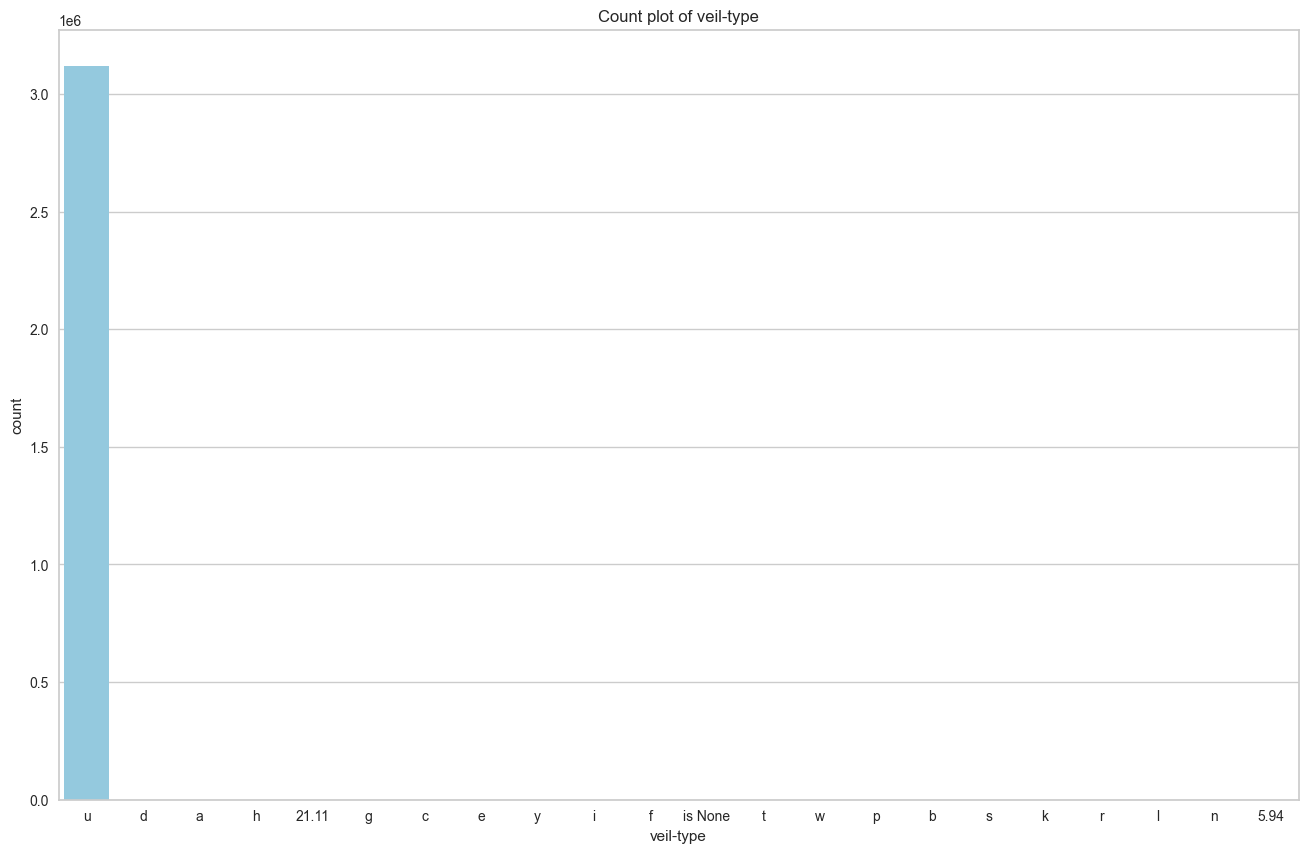

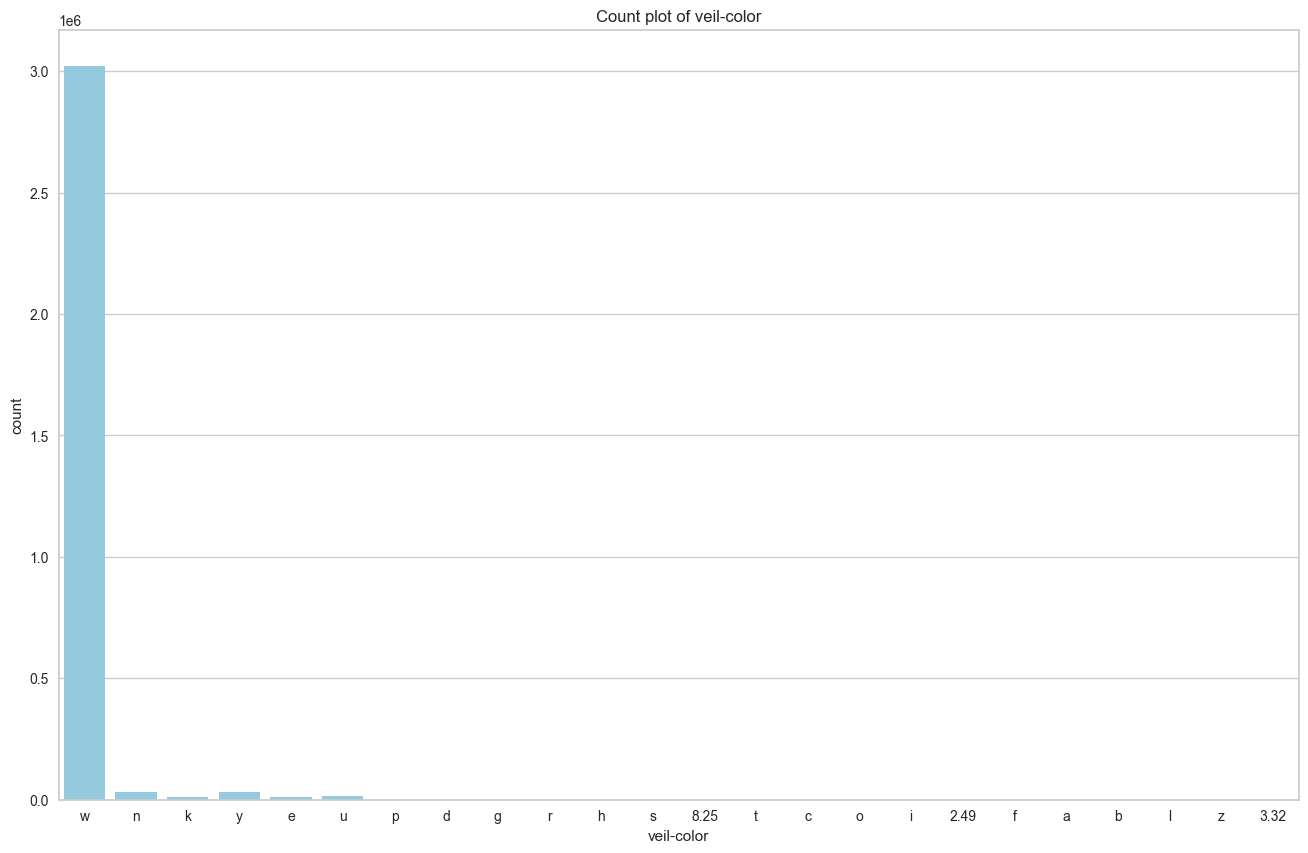

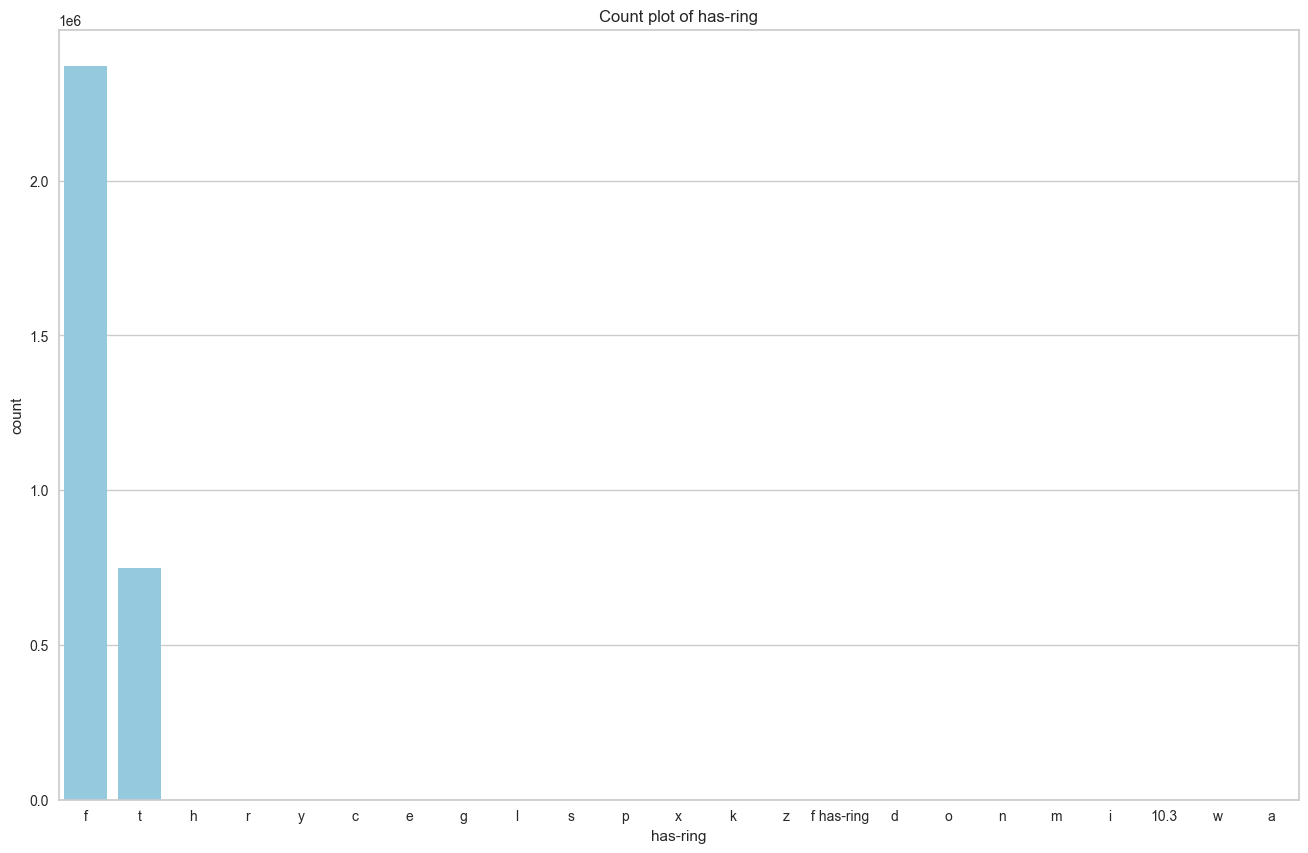

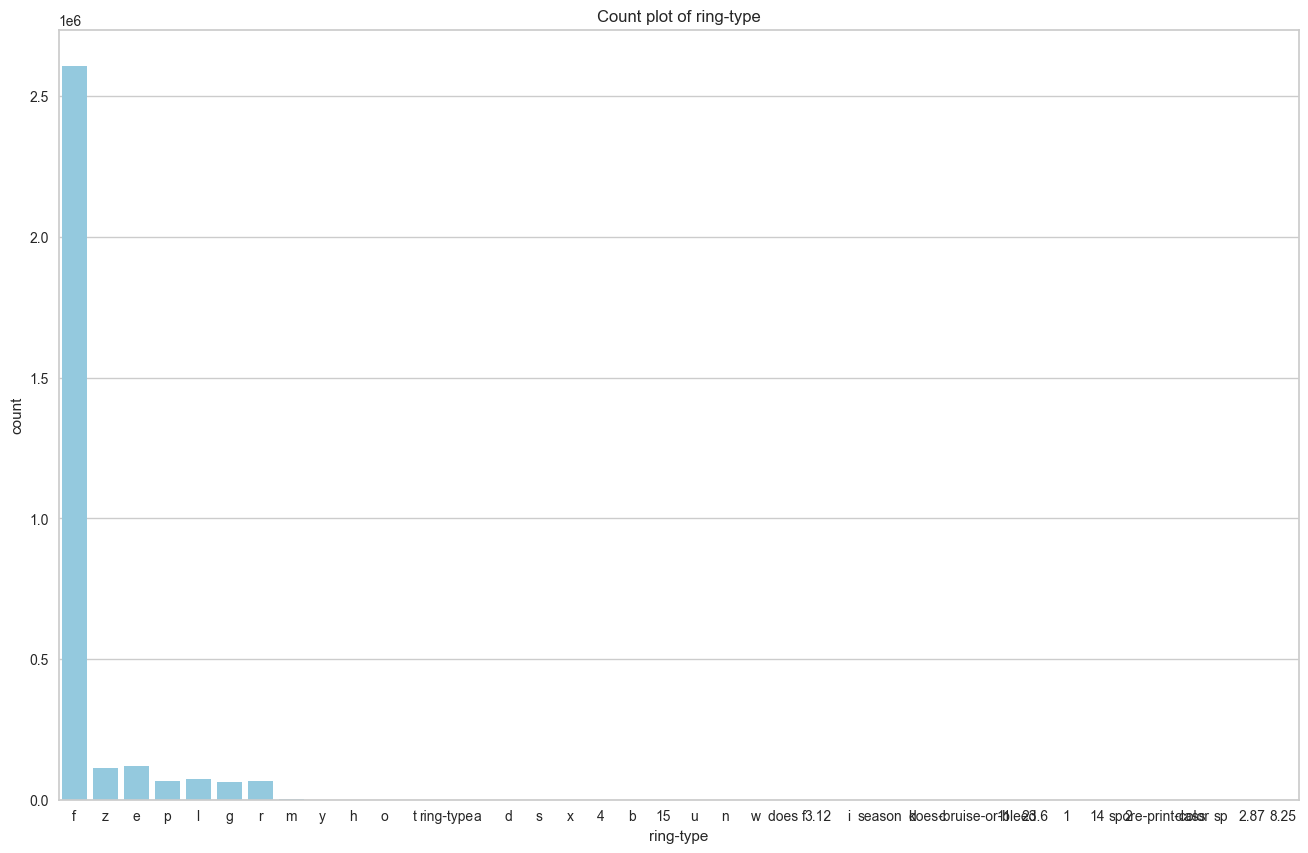

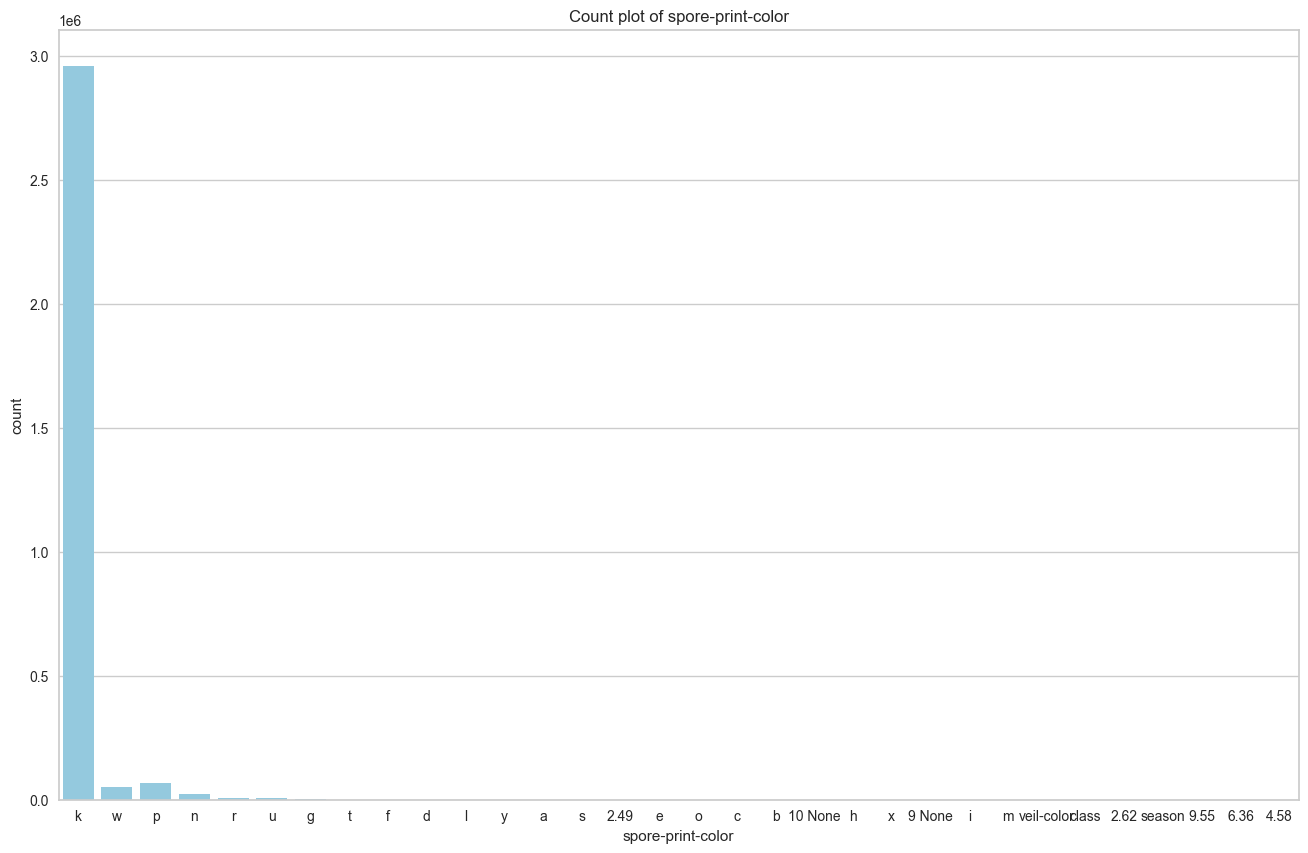

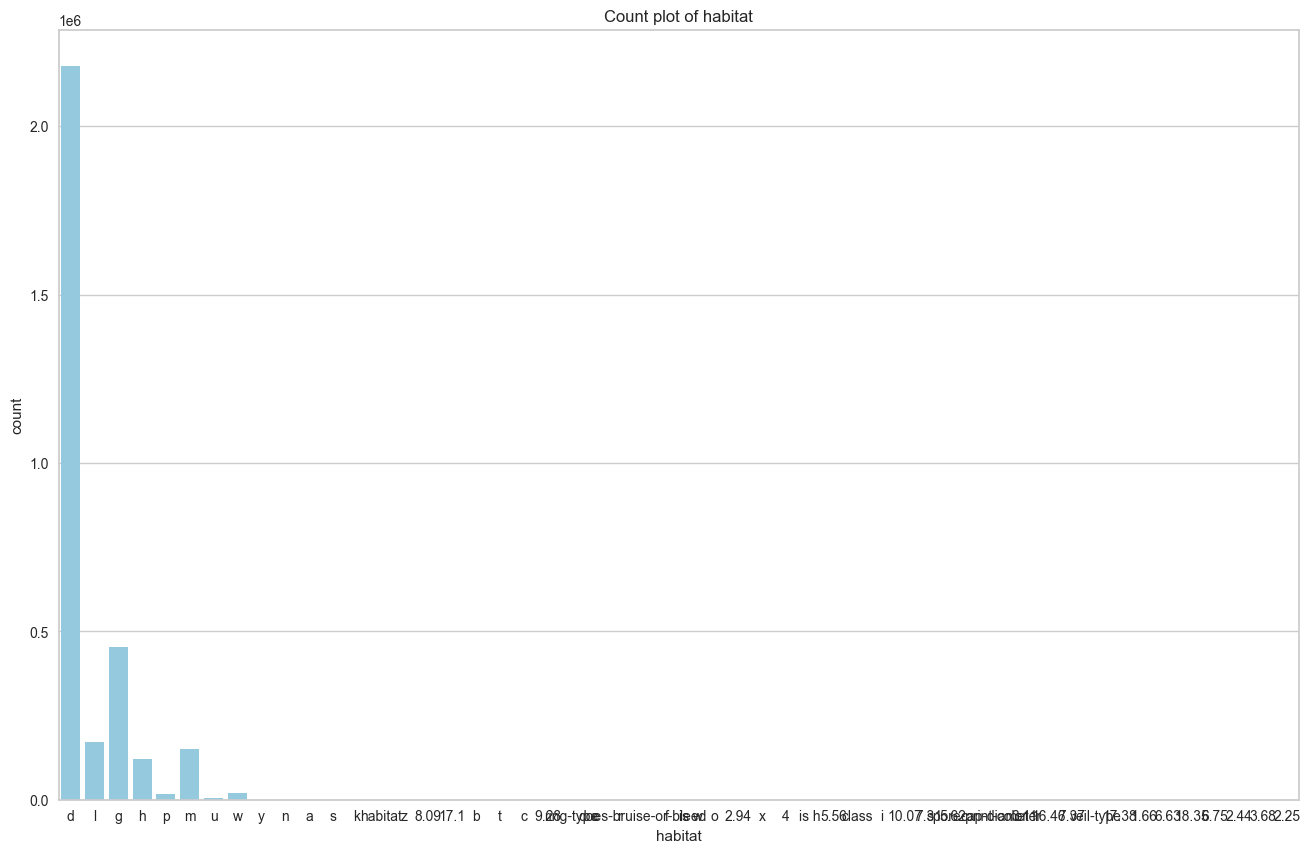

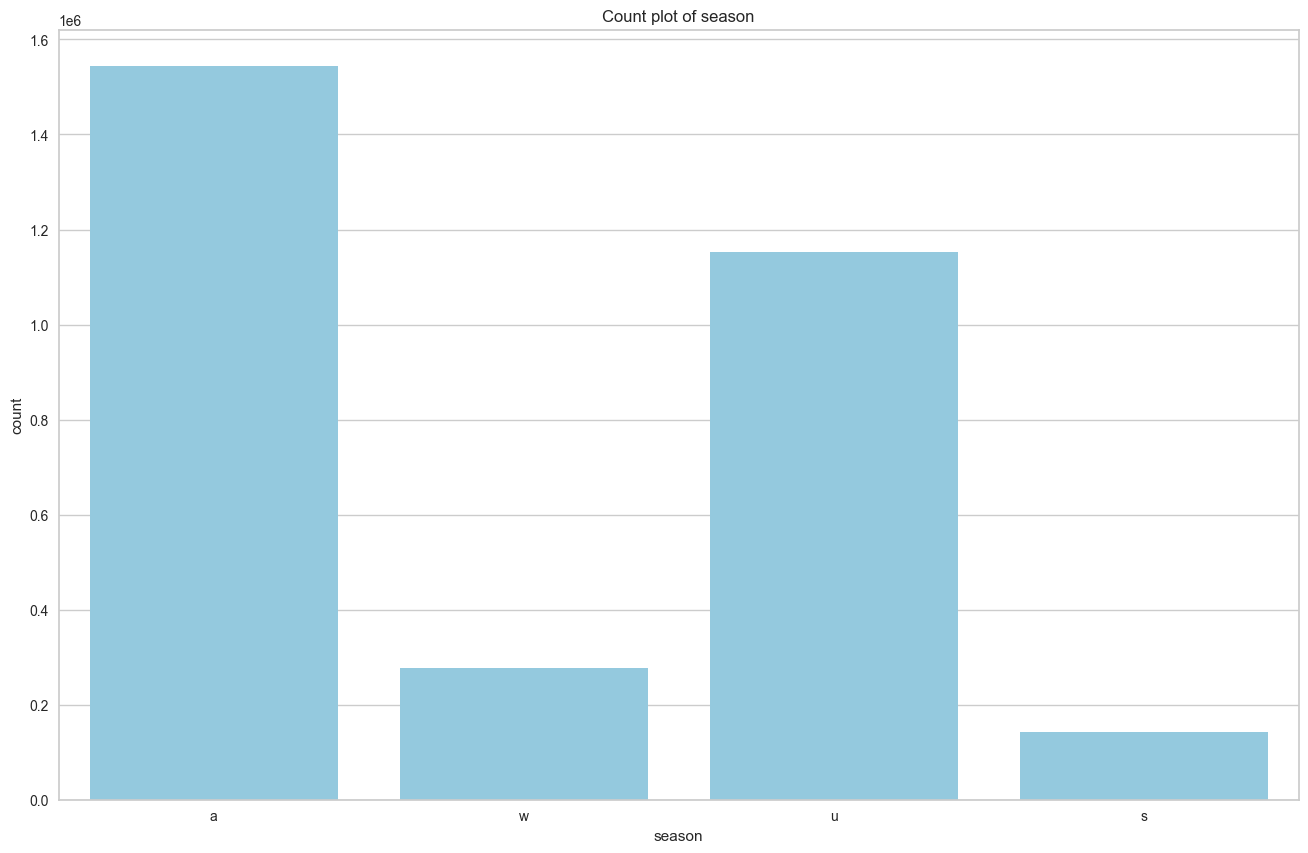

In [16]:
for col in catigorical_col:
    plt.figure(figsize=(16, 10))
    sns.countplot(x=col, data=df_cleaned , color='skyblue') 
    plt.title(f'Count plot of {col}')
    plt.show()


In [17]:
label_encoder = LabelEncoder()
for col in catigorical_col:
    df_cleaned[col]=label_encoder.fit_transform(df_cleaned[col])

In [18]:
df_cleaned.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,0,8.80,53,72,72,8,44,28,59,...,15,51,55,19,21,5,18,17,25,0
1,1,1,4.51,71,56,64,8,44,28,46,...,15,58,47,19,21,18,39,17,25,3
2,2,0,6.94,53,72,49,8,75,28,59,...,15,51,46,19,21,5,18,17,36,3
3,3,0,3.88,53,81,57,8,70,28,37,...,15,51,55,19,21,5,18,17,25,2
4,4,0,5.85,71,65,74,8,47,28,59,...,15,51,55,19,21,5,18,17,29,0


In [19]:
x=df_cleaned.drop('class' , axis=1)
y=df_cleaned['class']

In [20]:
x.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,8.80,53,72,72,8,44,28,59,4.51,...,15,51,55,19,21,5,18,17,25,0
1,1,4.51,71,56,64,8,44,28,46,4.79,...,15,58,47,19,21,18,39,17,25,3
2,2,6.94,53,72,49,8,75,28,59,6.85,...,15,51,46,19,21,5,18,17,36,3
3,3,3.88,53,81,57,8,70,28,37,4.16,...,15,51,55,19,21,5,18,17,25,2
4,4,5.85,71,65,74,8,47,28,59,3.37,...,15,51,55,19,21,5,18,17,29,0


In [21]:
y

0          0
1          1
2          0
3          0
4          0
          ..
3116940    0
3116941    0
3116942    1
3116943    0
3116944    1
Name: class, Length: 3116945, dtype: int32

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.3 , random_state=0)


In [23]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (935083, 21)
y_train shape =  (935083,)
x_test shape =  (2181862, 21)
y_test shape =  (2181862,)


In [24]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train , y_train)
rf_pred=rf_model.predict(x_test)

In [25]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    988058
           1       0.99      0.99      0.99   1193804

    accuracy                           0.99   2181862
   macro avg       0.99      0.99      0.99   2181862
weighted avg       0.99      0.99      0.99   2181862



In [26]:
accuracy_score(y_test , rf_pred)


0.9911415112413159